In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [173]:
fpath = '/global/homes/c/chmodi/Programs/flowpm-ffts/scripts/timelogs'

lines = []
with open(fpath + '/alltimes') as ff:
    lines.append(ff.readlines())

lines=lines[0]

In [174]:
ll = lines[0]
print(ll)

bss = []
for ll in lines:
    bss.append(int(ll.split('log_')[1].split('-')[0]))
times = []
for ll in lines:
    times.append(float(ll.split(':')[2]))

mesh = []
for ll in lines:
    b1, b2 = int(ll.split('b1=')[1].split(',')[0]), int(ll.split('b2=')[1].split(']')[0])
    mesh.append([b1, b2, b1*b2])
mesh = np.array(mesh)

log_1024-b11-b216:Time for  Shape[b1=1, b2=16]  is :  2.8204840207099915



In [175]:
mesh;

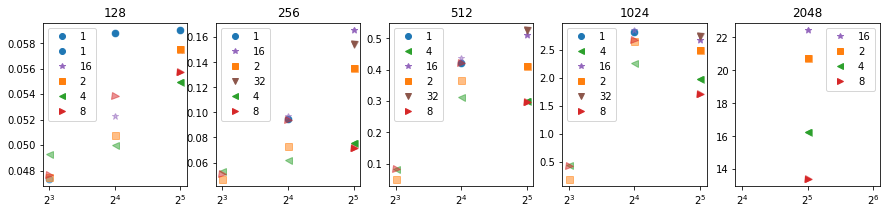

In [179]:
mss = ['o', 's', '<', '>', '*', 'v']

fig, ax = plt.subplots(1, 5, figsize=(15, 3))
nc = 1024
for inc, nc in enumerate([128, 256, 512, 1024, 2048]):
    
    for i in range(len(lines)):
        if bss[i] == nc:
            ilog = int(np.log2(mesh[i][0]))
    #         plt.scatter(mesh[i][-1], times[i], marker=mss[ilog])
            ax[inc].plot(mesh[i][-1], times[i], mss[ilog], color='C%d'%ilog, ms=7, alpha=0.5)
            if mesh[i][-1] == 32: ax[inc].plot(mesh[i][-1], times[i], mss[ilog], color='C%d'%ilog, label=2**ilog)
            elif mesh[i][-1] == 16 and ilog==0: ax[inc].plot(mesh[i][-1], times[i], mss[ilog], color='C%d'%ilog, label=2**ilog)
    ax[inc].set_xscale('log', basex=2)
    ax[inc].legend()
    ax[inc].set_title(nc)

In [165]:
100//np.log2(2048)

9.0

In [156]:
mss = ['o', 's', '<', '>', '*', 'v']

for inc, nc in enumerate([128, 256, 512, 1024]):
    
    for i in range(len(lines)):
        if bss[i] == nc and mesh[i][-1] == 32:
            print(nc, mesh[i][0], mesh[i][1], mesh[i][2])
            

128 1 32 32
128 16 2 32
128 2 16 32
128 4 8 32
128 8 4 32
256 4 8 32
256 16 2 32
256 2 16 32
256 32 1 32
256 4 8 32
256 8 4 32
512 4 8 32
512 16 2 32
512 2 16 32
512 32 1 32
1024 4 8 32
1024 16 2 32
1024 2 16 32
1024 32 1 32
1024 8 4 32


In [157]:
mss = ['o', 's', '<', '>', '*', 'v']

for inc, nc in enumerate([256]):
    
    for i in range(len(lines)):
        if bss[i] == nc and mesh[i][-1] == 32:
            print(nc, mesh[i][0], mesh[i][1], mesh[i][2])
            print(lines[i])
            

256 4 8 32
log_256-b114-b28:Time for  Shape[b1=4, b2=8]  is :  0.0812404465675354

256 16 2 32
log_256-b116-b22:Time for  Shape[b1=16, b2=2]  is :  0.16548025369644165

256 2 16 32
log_256-b12-b216:Time for  Shape[b1=2, b2=16]  is :  0.13581803560256958

256 32 1 32
log_256-b132-b21:Time for  Shape[b1=32, b2=1]  is :  0.15419225931167602

256 4 8 32
log_256-b14-b28:Time for  Shape[b1=4, b2=8]  is :  0.07576417207717895

256 8 4 32
log_256-b18-b24:Time for  Shape[b1=8, b2=4]  is :  0.07137725353240967



In [58]:
np.log2(8, 2)

3.0